# <center>  EDA </br>
#  <center> -- Análisis Exploratorio de Datos--</center>
Como científicos de datos y analistas, se exploran diferentes aspectos de los datos, como la distribución de variables, relaciones entre variables, tendencias a lo largo del tiempo, y cualquier otra característica que pueda ser relevante para comprender la naturaleza de los datos.
<center> Aquí lo haremos sobre los datos del dataframe 'df_items'

### <center>Importar Librerias</center>

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import funciones
import os

%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings("ignore")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


_________________

### <center>Extracción de datos</center>

In [11]:
# Se obtienela ruta completa al archivo CSV desde la ubicación del notebook
csv_path = os.path.join('..', 'CSV', 'items_limpio.csv')

# Se lee el archivo CSV
df_items = pd.read_csv(csv_path, encoding='utf-8')

________________

In [12]:
# Primera visualización del dataframe
df_items

,item_id,item_name,playtime_forever,steam_id,items_count,user_id,user_url
0,10,Counter-Strike,6,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...
1,20,Team Fortress Classic,0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...
2,30,Day of Defeat,7,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...
3,40,Deathmatch Classic,0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...
4,50,Half-Life: Opposing Force,0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...
...,...,...,...,...,...,...,...
5094087,346330,BrainBread 2,0,76561198329548331,7,76561198329548331,http://steamcommunity.com/profiles/76561198329...
5094088,373330,All Is Dust,0,76561198329548331,7,76561198329548331,http://steamcommunity.com/profiles/76561198329...
5094089,388490,One Way To Die: Steam Edition,3,76561198329548331,7,76561198329548331,http://steamcommunity.com/profiles/76561198329...
5094090,521570,You Have 10 Seconds 2,4,76561198329548331,7,76561198329548331,http://steamcommunity.com/profiles/76561198329...


In [13]:
# Se verifcan los datos de las columnas
funciones.verificar_tipo_datos(df_items)

,Columna,Tipo,NO_nulos_%,Nulos_%,Nulos
0,item_id,[<class 'int'>],100.0,0.0,0
1,item_name,[<class 'str'>],100.0,0.0,0
2,playtime_forever,[<class 'int'>],100.0,0.0,0
3,steam_id,[<class 'int'>],100.0,0.0,0
4,items_count,[<class 'int'>],100.0,0.0,0
5,user_id,[<class 'str'>],100.0,0.0,0
6,user_url,[<class 'str'>],100.0,0.0,0


____________

### <center>Columna: playtime_forever</center>
<center>Se analiza el tiempo acumulado de juego por jugador</center>

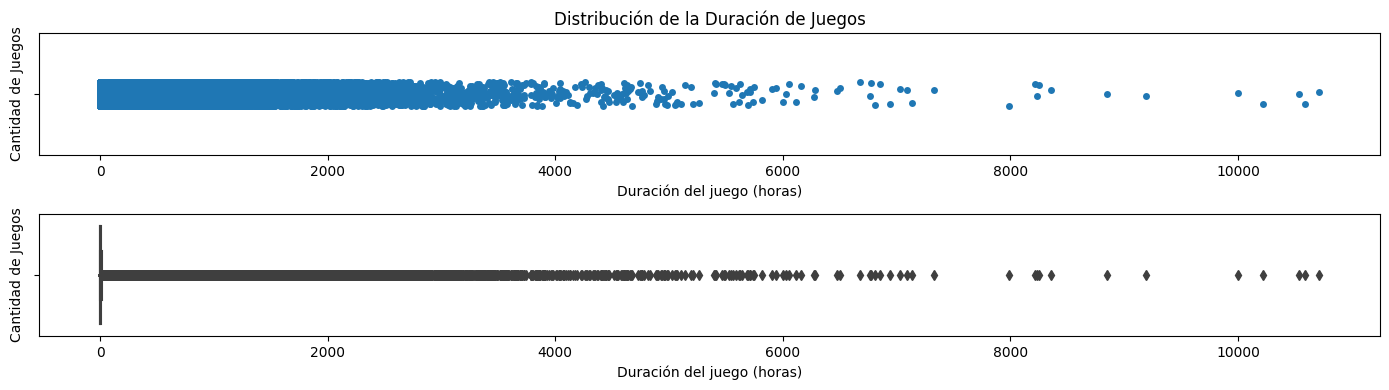

In [14]:
# Se calcula la duración en horas dividiendo 'playtime_forever' entre 60
df_items['playtime_hours'] = df_items['playtime_forever'] / 60

# Se crea una figura con dos subgráficos
fig = plt.figure(figsize=(14, 4))

# Subgráfico 1: Gráfico de puntos (stripplot)
ax1 = fig.add_subplot(211)
sns.stripplot(data=df_items, x='playtime_hours', ax=ax1)
ax1.set_xlabel('Duración del juego (horas)')
ax1.set_ylabel('Cantidad de Juegos')
ax1.set_title('Distribución de la Duración de Juegos')

# Subgráfico 2: Diagrama de caja (boxplot)
ax2 = fig.add_subplot(212, sharex=ax1)
sns.boxplot(data=df_items, x='playtime_hours', ax=ax2)
ax2.set_xlabel('Duración del juego (horas)')
ax2.set_ylabel('Cantidad de Juegos')

# Se muestra y ajusta el espaciado entre subgráficos
plt.tight_layout()
plt.show()



In [22]:
# Se calcula la duración en horas dividiendo 'playtime_forever' entre 60
df_items['playtime_hr'] = df_items['playtime_forever'] / 60

# Se utiliza el método 'describe' en la columna 'price'
descripcion = df_items['playtime_hr'].describe()

# Se visualizan los valores
descripcion


count    5.094092e+06
mean     1.650857e+01
std      9.023516e+01
min      0.000000e+00
25%      0.000000e+00
50%      5.666667e-01
75%      5.916667e+00
max      1.071288e+04
Name: playtime_hr, dtype: float64

In [16]:
# Se cuentan los valores atípicos
funciones.valores_atipicos(df_items['playtime_hr'])

Hay 763595 valores atípicos


CONCLUSION: 
- Un jugador promedio juega 34 min
- y el 75% jugó menos de 6 hr
- Se observan gran cantidad de valores atipos(outliers)

________________

### <center>Columna: items_count</center>
<center>Se analiza la cantidad de juegos que consumen/compran los usuarios.</center>

In [17]:
# Se agrupa por usuario la cantidad de items
items_count_user = df_items.groupby('user_id')['items_count'].unique().explode()

# Se crea un DataFrame con la cantidad de items por usuario
items_count_user = pd.DataFrame(items_count_user)

# Se ordena el DataFrame por la cantidad de items en orden descendente
items_count_user_o = items_count_user.sort_values('items_count', ascending=False)


<Figure size 1400x500 with 0 Axes>

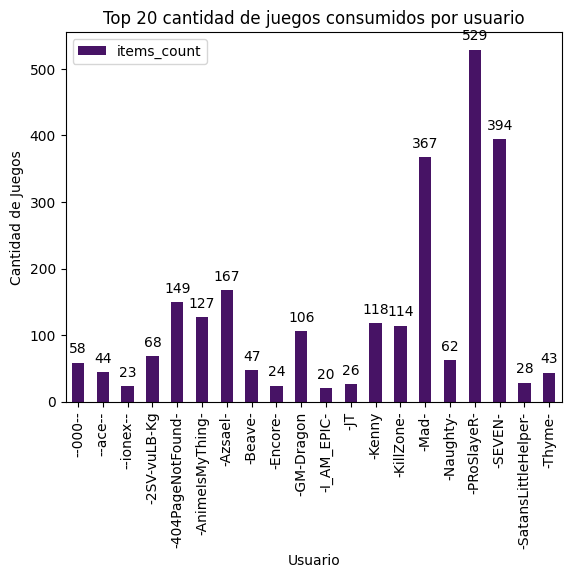

In [18]:
# Se selecciona una paleta de colores de Seaborn
colores = sns.color_palette("viridis", len(items_count_user[:20]))

# Se grafica la cantidad de items por usuario con colores distintos y etiquetas encima de las barras
plt.figure(figsize=(14, 5))
ax = items_count_user[:20].plot(kind='bar', color=colores)
plt.xlabel('Usuario')
plt.ylabel('Cantidad de Juegos')
plt.title('Top 20 cantidad de juegos consumidos por usuario')

# Se agrega etiquetas con los valores encima de las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()


CONCLUSION:
- El que más juegos consumió fue PRoSlayeR con 529

____________